# Assembling our quarterback dataset
Along with the EDA, we also do the data wrangling to put together the dataset we'll use for our quarterback model.<br>

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nfl_data_py as nfl

In [201]:
import sqlite3

In [202]:
# # Connect to the SQLite database
# conn = sqlite3.connect('nfl_dfs.db')

# query_weekly = "SELECT * FROM weekly_data;"
# query_spread = "SELECT * FROM spreads_totals"
# query_pbp = "SELECT * FROM pbp_non_defense"

# weekly_df = pd.read_sql_query(query_weekly, conn)
# spread_df = pd.read_sql_query(query_spread, conn)
# pbp_df = pd.read_sql_query(query_pbp, conn)

# # Close the database connection
# conn.close()

In [203]:
weekly_df.head()

,id,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,0,00-0000003,None,Abdul-Karim al-Jabbar,RB,RB,None,IND,2000,1,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,-0.2,-0.2
1,1,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,1,...,0.0,-0.312120,0,0.0,0.045455,NaN,NaN,0.0,0.3,1.3
2,2,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,12,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,1.8,1.8
3,3,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,14,...,1.0,0.609493,0,0.0,0.071429,NaN,NaN,0.0,4.9,5.9
4,4,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,15,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,1.4,1.4


In [204]:
spread_df.head()

,season,week,game_id,team,opponent,spread_line,total_line,outdoors,grass,home_team,pred_total,opp_total
0,2000,1,2000_01_ARI_NYG,ARI,NYG,-6.5,40.0,1,1,0,16.75,23.25
1,2000,1,2000_01_ARI_NYG,NYG,ARI,6.5,40.0,1,1,1,23.25,16.75
2,2000,1,2000_01_BAL_PIT,BAL,PIT,2.5,37.0,1,0,0,19.75,17.25
3,2000,1,2000_01_BAL_PIT,PIT,BAL,-2.5,37.0,1,0,1,17.25,19.75
4,2000,1,2000_01_CAR_WAS,CAR,WAS,-10.5,47.5,1,1,0,18.50,29.00


In [205]:
pbp_df.head()

,play_id,game_id,old_game_id,home_team,away_team,fumble_lost,season_type,week,posteam,posteam_type,...,play,passer_id,rusher_id,receiver_id,name,id,fantasy_player_name,fantasy_player_id,fantasy,fantasy_id
0,34.0,2000_01_ARI_NYG,2000090300,NYG,ARI,0.0,REG,1,ARI,away,...,1.0,None,None,None,None,None,None,None,None,None
1,70.0,2000_01_ARI_NYG,2000090300,NYG,ARI,0.0,REG,1,ARI,away,...,0.0,None,None,None,None,None,None,None,None,None
2,106.0,2000_01_ARI_NYG,2000090300,NYG,ARI,0.0,REG,1,ARI,away,...,1.0,None,00-0019641,None,T.Jones,00-0019641,T.Jones,00-0019641,T.Jones,00-0019641
3,131.0,2000_01_ARI_NYG,2000090300,NYG,ARI,0.0,REG,1,ARI,away,...,1.0,00-0013042,None,00-0019641,J.Plummer,00-0013042,T.Jones,00-0019641,T.Jones,00-0019641
4,148.0,2000_01_ARI_NYG,2000090300,NYG,ARI,0.0,REG,1,ARI,away,...,1.0,00-0013042,None,00-0014328,J.Plummer,00-0013042,F.Sanders,00-0014328,F.Sanders,00-0014328


In [206]:
nfl.see_weekly_cols()

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

In [207]:
qb_cols = ['player_id', 'player_name', 'player_display_name', 'position', 'recent_team', 'season', 'week',\
 'season_type', 'opponent_team', 'completions', 'attempts',\
 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',\
 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',\
 'passing_yards_after_catch', 'passing_epa',\
 'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',\
 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_2pt_conversions',\
 'receptions', 'receiving_yards', 'receiving_tds',\
 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_2pt_conversions', 'racr', 'fantasy_points', 'fantasy_points_ppr']

In [208]:
seasons = list(np.arange(2000, 2024, 1))

In [209]:
# nfl_weekly = nfl.import_weekly_data(seasons)

# Weekly data
This weekly data will enable us to derive the fantasy points of each QB in every game.

In [210]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124708 entries, 0 to 124707
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           124708 non-null  int64  
 1   player_id                    124708 non-null  object 
 2   player_name                  61503 non-null   object 
 3   player_display_name          124708 non-null  object 
 4   position                     124639 non-null  object 
 5   position_group               124639 non-null  object 
 6   headshot_url                 69769 non-null   object 
 7   recent_team                  124708 non-null  object 
 8   season                       124708 non-null  int64  
 9   week                         124708 non-null  int64  
 10  season_type                  124708 non-null  object 
 11  opponent_team                124708 non-null  object 
 12  completions                  124708 non-null  int64  
 13 

In [211]:
qb_df = weekly_df[weekly_df['position'] == 'QB']

In [212]:
qb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15425 entries, 7 to 124691
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15425 non-null  int64  
 1   player_id                    15425 non-null  object 
 2   player_name                  9053 non-null   object 
 3   player_display_name          15425 non-null  object 
 4   position                     15425 non-null  object 
 5   position_group               15425 non-null  object 
 6   headshot_url                 10150 non-null  object 
 7   recent_team                  15425 non-null  object 
 8   season                       15425 non-null  int64  
 9   week                         15425 non-null  int64  
 10  season_type                  15425 non-null  object 
 11  opponent_team                15425 non-null  object 
 12  completions                  15425 non-null  int64  
 13  attempts            

In [213]:
qb_df = qb_df[qb_cols]

In [214]:
qb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15425 entries, 7 to 124691
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  15425 non-null  object 
 1   player_name                9053 non-null   object 
 2   player_display_name        15425 non-null  object 
 3   position                   15425 non-null  object 
 4   recent_team                15425 non-null  object 
 5   season                     15425 non-null  int64  
 6   week                       15425 non-null  int64  
 7   season_type                15425 non-null  object 
 8   opponent_team              15425 non-null  object 
 9   completions                15425 non-null  int64  
 10  attempts                   15425 non-null  int64  
 11  passing_yards              15425 non-null  float64
 12  passing_tds                15425 non-null  int64  
 13  interceptions              15425 non-null  float64

In [215]:
qb_cols_to_group = ['season', 'week', 'player_id', 'player_display_name', 'recent_team', 'opponent_team']

Curious to see if there are any two QBs with the same name.

In [216]:
# Group by 'player_display_name' and check the number of unique 'player_id's
duplicate_names = qb_df.groupby('player_display_name')['player_id'].nunique()

# Filter the results to find names associated with more than one unique ID
duplicate_names = duplicate_names[duplicate_names > 1]

In [217]:
duplicate_names

Series([], Name: player_id, dtype: int64)

In [218]:
qb_scoring_cols = ['passing_yards', 'passing_tds', 'interceptions', 'passing_2pt_conversions', 'rushing_yards',\
                   'rushing_tds', 'rushing_fumbles_lost', 'rushing_2pt_conversions', 'receptions', 'receiving_yards',\
                   'receiving_tds', 'receiving_fumbles_lost', 'receiving_2pt_conversions', 'sack_fumbles_lost', ]

In [219]:
qb_df = qb_df.set_index(qb_cols_to_group, drop = True)

# Fantasy points
This is where we calculate FanDuel and DraftKings points.

In [220]:
qb_df['FD_Pts'] = (qb_df['passing_yards'] * 0.04) + (qb_df['rushing_tds'] * 6) + (qb_df['rushing_yards'] * 0.1)\
+ (qb_df['passing_tds'] * 4) + (qb_df['receiving_yards'] * 0.1) + (qb_df['receiving_tds'] * 6) + (qb_df['receptions'] * 0.5)\
+ (qb_df['rushing_2pt_conversions'] * 2) + (qb_df['passing_2pt_conversions'] * 2) + (qb_df['receiving_2pt_conversions'] * 2)\
- (qb_df['interceptions']) - (qb_df['sack_fumbles_lost'] * 2) - (qb_df['receiving_fumbles_lost'] * 2) - (qb_df['rushing_fumbles_lost'] * 2)

In [221]:
qb_df['DK_Pts'] = (qb_df['passing_yards'] * 0.04) + (qb_df['rushing_tds'] * 6) + (qb_df['rushing_yards'] * 0.1)\
+ (qb_df['passing_tds'] * 4) + (qb_df['receiving_yards'] * 0.1) + (qb_df['receiving_tds'] * 6) + (qb_df['receptions'] * 1)\
+ (qb_df['rushing_2pt_conversions'] * 2) + (qb_df['passing_2pt_conversions'] * 2) + (qb_df['receiving_2pt_conversions'] * 2)\
- (qb_df['interceptions']) - (qb_df['sack_fumbles_lost']) - (qb_df['receiving_fumbles_lost']) - (qb_df['rushing_fumbles_lost'])


Adding DraftKings bonus points

In [222]:
qb_df['DK_Pts'] = np.where(qb_df['passing_yards'] >= 300, qb_df['DK_Pts'] + 3, qb_df['DK_Pts'])
qb_df['DK_Pts'] = np.where(qb_df['receiving_yards'] >= 100, qb_df['DK_Pts'] + 3, qb_df['DK_Pts'])
qb_df['DK_Pts'] = np.where(qb_df['rushing_yards'] >= 100, qb_df['DK_Pts'] + 3, qb_df['DK_Pts'])

In [223]:
#pacr = passing air conversion ratio (passing yards/air yards)

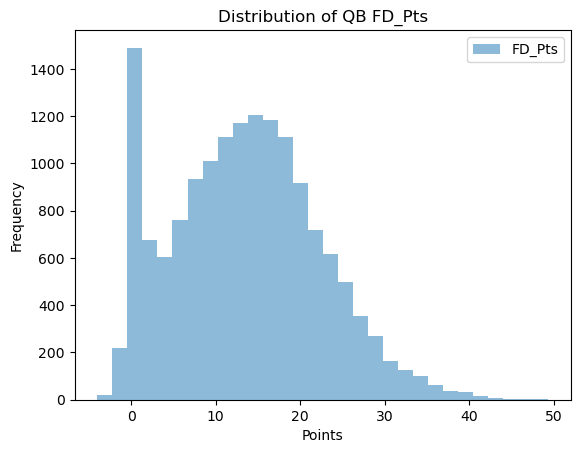

In [224]:
# Plot FD_Pts
plt.hist(qb_df['FD_Pts'], bins=30, alpha=0.5, label='FD_Pts')

# Adding titles and labels
plt.title('Distribution of QB FD_Pts')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

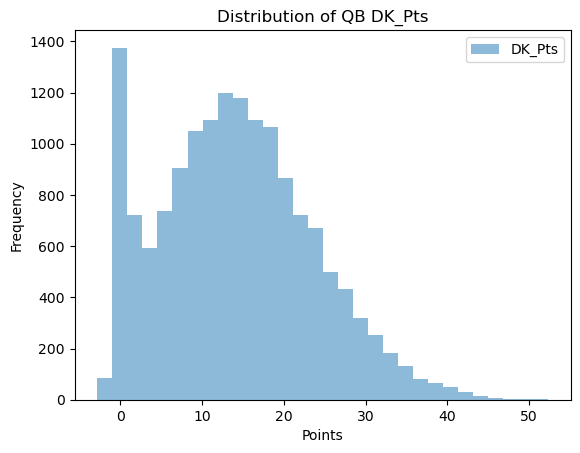

In [225]:
# Plot DK_Pts
plt.hist(qb_df['DK_Pts'], bins=30, alpha=0.5, label='DK_Pts')

# Adding titles and labels
plt.title('Distribution of QB DK_Pts')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Why the spike near zero?
It turns out that backup QBs are included in this data. So a backup could go in toward the end of the game and not throw a pass, or a starter could get hurt early in the game and not throw a pass. We probably should keep the backups in here since they are included in the FanDuel and DraftKings player lists. If a QB doesn't normally play, that probably should be reflected in the prediction. We'll keep an eye on that.

## Probably a good place to derive def_vs_pos variables
Let's group the QB DK_Pts and FD_Pts by game, so we get a composite number for one or all the QBs for each team in each game.

In [226]:
qb_df.reset_index(inplace = True)

In [227]:
grouped_pts = qb_df.groupby(['season', 'week', 'recent_team', 'opponent_team'])[['DK_Pts', 'FD_Pts']].sum().round(3)

In [228]:
#grouped_pts[(grouped_pts['opponent_team'] == 'CLE') & (grouped_pts['season'] == 2001) & (grouped_pts['week'] == 11)]

# Let's plot again
This smooths things out now that it accounts for multiple quarterbacks in a game for one team.

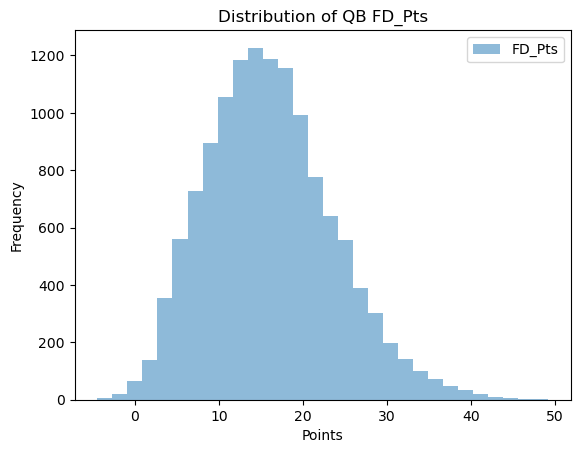

In [229]:
# Plot FD_Pts
plt.hist(grouped_pts['FD_Pts'], bins=30, alpha=0.5, label='FD_Pts')

# Adding titles and labels
plt.title('Distribution of QB FD_Pts')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

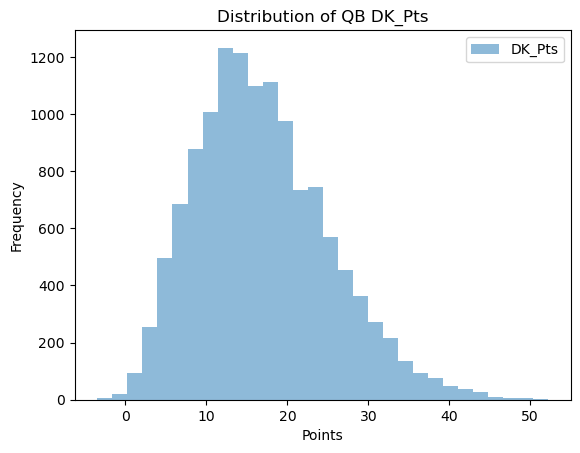

In [230]:
# Plot DK_Pts
plt.hist(grouped_pts['DK_Pts'], bins=30, alpha=0.5, label='DK_Pts')

# Adding titles and labels
plt.title('Distribution of QB DK_Pts')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [231]:
grouped_pts.reset_index(inplace = True)

In [232]:
grouped_pts = grouped_pts.sort_values(by = ['opponent_team', 'season', 'week'])
grouped_pts['opp_game_num'] = grouped_pts.groupby(['opponent_team']).cumcount() + 1
grouped_pts.reset_index(inplace = True)

In [233]:
grouped_pts_raw = grouped_pts.copy()

In [234]:
grouped_pts.drop(columns = ['index'], inplace = True)

# DvP variables
We'll take an 8-game rolling mean for fantasy points allowed to QBs for each team, even if the games go back to last season. DvP means defense vs. position.

In [235]:
def calculate_equal_rolling_mean(group, cols, suffix):
    """
    This function calculates a rolling mean for the last eight games, going back to previous season if necessary.
    It also calculates when there are less than eight games to use.
    """
    for col in cols:
        group[f'{col}{suffix}'] = (
            group[col].shift().rolling(window=8, min_periods=1).mean()
        )
    return group

In [236]:
grouped_pts = grouped_pts.groupby('opponent_team', as_index = False).apply(calculate_equal_rolling_mean, cols=['FD_Pts', 'DK_Pts'], suffix = '_DvP')

In [237]:
grouped_pts.drop(columns = ['DK_Pts', 'FD_Pts', 'opp_game_num'], inplace = True)

In [238]:
qb_df = pd.merge(qb_df, grouped_pts, on = ['season', 'week', 'recent_team', 'opponent_team'], how = 'left')

In [239]:
qb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     15425 non-null  int64  
 1   week                       15425 non-null  int64  
 2   player_id                  15425 non-null  object 
 3   player_display_name        15425 non-null  object 
 4   recent_team                15425 non-null  object 
 5   opponent_team              15425 non-null  object 
 6   player_name                9053 non-null   object 
 7   position                   15425 non-null  object 
 8   season_type                15425 non-null  object 
 9   completions                15425 non-null  int64  
 10  attempts                   15425 non-null  int64  
 11  passing_yards              15425 non-null  float64
 12  passing_tds                15425 non-null  int64  
 13  interceptions              15425 non-null  flo

In [240]:
# conn = sqlite3.connect('nfl_dfs.db')

# # Specify the table name
# table_name = 'pbp_non_defense'

# # Query the table and load it into a pandas DataFrame
# pbp_df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

# # Display the DataFrame
# print(pbp_df)

# # Close the connection
# conn.close()

In [241]:
pbp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135207 entries, 0 to 1135206
Data columns (total 89 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   play_id                        1135207 non-null  float64
 1   game_id                        1135207 non-null  object 
 2   old_game_id                    1135207 non-null  object 
 3   home_team                      1135207 non-null  object 
 4   away_team                      1135207 non-null  object 
 5   fumble_lost                    1099760 non-null  float64
 6   season_type                    1135207 non-null  object 
 7   week                           1135207 non-null  int64  
 8   posteam                        1071888 non-null  object 
 9   posteam_type                   1071888 non-null  object 
 10  defteam                        1071888 non-null  object 
 11  sp                             1135207 non-null  float64
 12  desc          

In [242]:
qb_df.reset_index(inplace = True)

In [243]:
qb_df.rename(columns = {'recent_team': 'posteam'}, inplace = True)

# Introducing role variables
We brought in play-by-play data to derive our role variable. For games where more than one quarterback took a snap for a team, we're going to see which one took more snaps and give that QB a QB_role value of 1. All other QBs will have a value of 2. This technique will take on greater importance when we do RBs and WRs. In the case of QBs, if a backup quarterback becomes the starter, we'll change the role value to 1, and that should provide a prediction that's more reflective of the QBs greater role.<br>

In [244]:
# Assuming passer_df is already created
passer_df = pbp_df.groupby(['season', 'week', 'posteam', 'passer_player_id'])['play_id'].count().reset_index()

In [245]:
# Sort by season, week, posteam, and the number of plays in descending order
passer_df = passer_df.sort_values(by=['season', 'week', 'posteam', 'play_id'], ascending=[True, True, True, False])

In [246]:
# Create a rank column to identify the top two QBs
passer_df['QB_role'] = passer_df.groupby(['season', 'week', 'posteam'])['play_id'].rank(method='first', ascending=False)

In [247]:
# Assign 'QB1' or 'QB2' based on the rank
#passer_df['QB_role'] = passer_df['rank'].apply(lambda x: 'QB1' if x == 1 else ('QB2' if x == 2 else None))

In [248]:
# Drop the rank column if you don't need it anymore
#passer_df = passer_df.drop(columns=['rank'])

In [249]:
passer_df.rename(columns = {'passer_player_id': 'player_id'}, inplace = True)

In [250]:
passer_df.drop(columns = ['play_id'], inplace = True)

# Merging
Now we'll merge so that our QB_role variable is added to the dataframe. This is where we also change the name of the dataframe to **quarterback_df.**

In [251]:
quarterback_df = pd.merge(qb_df, passer_df, on = ['season', 'week', 'posteam', 'player_id'], how = 'left')

In [252]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      15425 non-null  int64  
 1   season                     15425 non-null  int64  
 2   week                       15425 non-null  int64  
 3   player_id                  15425 non-null  object 
 4   player_display_name        15425 non-null  object 
 5   posteam                    15425 non-null  object 
 6   opponent_team              15425 non-null  object 
 7   player_name                9053 non-null   object 
 8   position                   15425 non-null  object 
 9   season_type                15425 non-null  object 
 10  completions                15425 non-null  int64  
 11  attempts                   15425 non-null  int64  
 12  passing_yards              15425 non-null  float64
 13  passing_tds                15425 non-null  int

In [253]:
#quarterback_df = quarterback_df.dropna(subset=['QB_role'])

# Paring down some of the columns
We're drop columns that won't be needed for features.

In [254]:
cols_to_keep = ['season', 'week', 'player_id', 'player_display_name', 'posteam',
       'opponent_team', 'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_fumbles_lost', 'passing_air_yards', 
        'pacr',  'carries', 'rushing_yards', 'rushing_tds', 'FD_Pts', 'DK_Pts', 'FD_Pts_DvP', 'DK_Pts_DvP', 'QB_role']

In [255]:
quarterback_df = quarterback_df[cols_to_keep]

In [256]:
#quarterback_df[quarterback_df['season'] >= 2006]['passing_air_yards']

In [257]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               15425 non-null  int64  
 1   week                 15425 non-null  int64  
 2   player_id            15425 non-null  object 
 3   player_display_name  15425 non-null  object 
 4   posteam              15425 non-null  object 
 5   opponent_team        15425 non-null  object 
 6   completions          15425 non-null  int64  
 7   attempts             15425 non-null  int64  
 8   passing_yards        15425 non-null  float64
 9   passing_tds          15425 non-null  int64  
 10  interceptions        15425 non-null  float64
 11  sacks                15425 non-null  float64
 12  sack_fumbles_lost    15425 non-null  int64  
 13  passing_air_yards    15425 non-null  float64
 14  pacr                 14669 non-null  float64
 15  carries              15425 non-null 

# Filling missing values
We have found that dropping rows with missing values can affect calculations down the line. So we need to find ways to fill the missing values.<br>

We also discovered while verifying our data that passing_air_yards wasn't kept until 2006. So the value for that feature is 0 until 2005 and it doesn't register as a missing value. We have to fix that.<br>

## But first, dropping all data before 2006

And we decided to fix that by dropping all data before 2006. Yes, it's only one feature, but filling with the mean created a big spike at the mean in the histogram. This is a fairly modern analytic that we'd like to use. This will still leave us with plenty of data.

In [258]:
quarterback_df = quarterback_df[quarterback_df['season'] >= 2006]

In [259]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11607 entries, 3818 to 15424
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               11607 non-null  int64  
 1   week                 11607 non-null  int64  
 2   player_id            11607 non-null  object 
 3   player_display_name  11607 non-null  object 
 4   posteam              11607 non-null  object 
 5   opponent_team        11607 non-null  object 
 6   completions          11607 non-null  int64  
 7   attempts             11607 non-null  int64  
 8   passing_yards        11607 non-null  float64
 9   passing_tds          11607 non-null  int64  
 10  interceptions        11607 non-null  float64
 11  sacks                11607 non-null  float64
 12  sack_fumbles_lost    11607 non-null  int64  
 13  passing_air_yards    11607 non-null  float64
 14  pacr                 11042 non-null  float64
 15  carries              11607 non-null  i

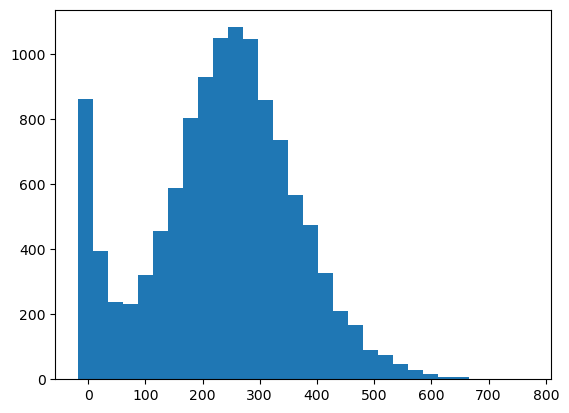

In [260]:
plt.hist(quarterback_df['passing_air_yards'], bins = 30)
plt.show()

In [261]:
# quarterback_df['passing_air_yards'] = np.where((quarterback_df['season'] <= 2005) & (quarterback_df['QB_role'] == 1),\
#                                                quarterback_df['passing_air_yards'].mean(), quarterback_df['passing_air_yards'])

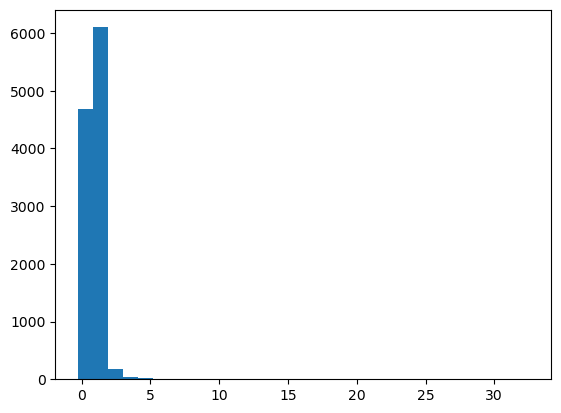

In [262]:
plt.hist(quarterback_df['pacr'], bins = 30)
plt.show()

In [263]:
quarterback_df['pacr'].describe()

count    11042.000000
mean         0.930785
std          0.656345
min         -0.285714
25%          0.673267
50%          0.865433
75%          1.091263
max         32.500000
Name: pacr, dtype: float64

In [264]:
missing_pacr = quarterback_df[quarterback_df['pacr'].isna()][['completions']].value_counts()

In [265]:
missing_pacr

completions
0              564
1                1
Name: count, dtype: int64

# Filling pacr
pacr is passing yards/air yards, and every QB will have at least some air yards even if he doesn't have passing yards. So we were going to just fill missing pacr values with 0, but upon further review, we thought about filling with 1. Then we saw the mean is almost 1 (0.93) and the median is .86. So we'll just fill with the mean

In [266]:
quarterback_df['pacr'] = quarterback_df['pacr'].fillna(quarterback_df['pacr'].mean())

We'll fill in missing QB_role values with 2.

In [267]:
quarterback_df['QB_role'] = quarterback_df['QB_role'].fillna(2)

The first row of every team grouping when we calculated DvP was NaN because there was no previous value. We'll fill those in with the mean.

In [268]:
quarterback_df['FD_Pts_DvP'] = quarterback_df['FD_Pts_DvP'].fillna(quarterback_df['FD_Pts_DvP'].mean())
quarterback_df['DK_Pts_DvP'] = quarterback_df['DK_Pts_DvP'].fillna(quarterback_df['DK_Pts_DvP'].mean())

In [269]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11607 entries, 3818 to 15424
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               11607 non-null  int64  
 1   week                 11607 non-null  int64  
 2   player_id            11607 non-null  object 
 3   player_display_name  11607 non-null  object 
 4   posteam              11607 non-null  object 
 5   opponent_team        11607 non-null  object 
 6   completions          11607 non-null  int64  
 7   attempts             11607 non-null  int64  
 8   passing_yards        11607 non-null  float64
 9   passing_tds          11607 non-null  int64  
 10  interceptions        11607 non-null  float64
 11  sacks                11607 non-null  float64
 12  sack_fumbles_lost    11607 non-null  int64  
 13  passing_air_yards    11607 non-null  float64
 14  pacr                 11607 non-null  float64
 15  carries              11607 non-null  i

In [270]:
cols_L8 = ['completions', 'attempts', 'passing_yards', 'passing_tds','interceptions',\
           'sacks', 'passing_air_yards', 'pacr', 'carries', 'rushing_yards', 'rushing_tds']

In [271]:
qb_L8_features = quarterback_df.groupby(['player_id', 'player_display_name', 'season', 'week'])[cols_L8].sum()

In [272]:
qb_L8_features

completions  attempts  \
player_id  player_display_name season week                          
00-0000865 Charlie Batch       2006   1              15        25   
                                      6               1         1   
                                      7               8        13   
                                      12              1         1   
                                      14              0         0   
...                                                 ...       ...   
00-0039163 C.J. Stroud         2023   20             19        33   
00-0039164 Anthony Richardson  2023   1              24        37   
                                      2               6        10   
                                      4              11        25   
                                      5               9        12   

                                            passing_yards  passing_tds  \
player_id  player_display_name season week                               
00-0000865 Charlie Batch       2006   1             209.0            3   
                                      6               6.0            0   
                                      7             195.0            2   
                                      12             10.0            0   
                                      14              0.0            0   
...                                                   ...          ...   
00-0039163 C.J. Stroud         2023   20            175.0            0   
00-0039164 Anthony Richardson  2023   1             223.0            1   
                                      2              56.0            0   
                                      4             200.0            2   
                                      5              98.0            0   

                                            interceptions  sacks  \
player_id  player_display_name season week                         
00-0000865 Charlie Batch       2006   1               0.0    3.0   
                                      6               0.0    0.0   
                                      7               0.0    0.0   
                                      12              0.0    0.0   
                                      14              0.0    0.0   
...                                                   ...    ...   
00-0039163 C.J. Stroud         2023   20              0.0    0.0   
00-0039164 Anthony Richardson  2023   1               1.0    4.0   
                                      2               0.0    0.0   
                                      4               0.0    2.0   
                                      5               0.0    1.0   

                                            passing_air_yards      pacr  \
player_id  player_display_name season week                                
00-0000865 Charlie Batch       2006   1                 233.0  0.896996   
                                      6                   1.0  6.000000   
                                      7                 190.0  1.026316   
                                      12                 -3.0  0.000000   
                                      14                  0.0  0.930785   
...                                                       ...       ...   
00-0039163 C.J. Stroud         2023   20                221.0  0.791855   
00-0039164 Anthony Richardson  2023   1                 216.0  1.032407   
                                      2                  16.0  3.500000   
                                      4                 311.0  0.643087   
                                      5                 133.0  0.736842   

                                            carries  rushing_yards  \
player_id  player_display_name season week                           
00-0000865 Charlie Batch       2006   1           7           17.0   
                                      6           2           -2.0   
                                      7   

# L8 variables
L8 variables are rolling means of features over the last eight games that each QB has played. Just like we did for the DvP variables, we'll calculate features over the previous eight games for individual QBs.

In [273]:
qb_L8_features = qb_L8_features.sort_values(by = ['player_id', 'season', 'week'])
qb_L8_features['game_num'] = qb_L8_features.groupby(['player_id', 'season']).cumcount() + 1
#quarterback_df.reset_index(drop = True, inplace = True)

In [274]:
qb_L8_features

completions  attempts  \
player_id  player_display_name season week                          
00-0000865 Charlie Batch       2006   1              15        25   
                                      6               1         1   
                                      7               8        13   
                                      12              1         1   
                                      14              0         0   
...                                                 ...       ...   
00-0039163 C.J. Stroud         2023   20             19        33   
00-0039164 Anthony Richardson  2023   1              24        37   
                                      2               6        10   
                                      4              11        25   
                                      5               9        12   

                                            passing_yards  passing_tds  \
player_id  player_display_name season week                               
00-0000865 Charlie Batch       2006   1             209.0            3   
                                      6               6.0            0   
                                      7             195.0            2   
                                      12             10.0            0   
                                      14              0.0            0   
...                                                   ...          ...   
00-0039163 C.J. Stroud         2023   20            175.0            0   
00-0039164 Anthony Richardson  2023   1             223.0            1   
                                      2              56.0            0   
                                      4             200.0            2   
                                      5              98.0            0   

                                            interceptions  sacks  \
player_id  player_display_name season week                         
00-0000865 Charlie Batch       2006   1               0.0    3.0   
                                      6               0.0    0.0   
                                      7               0.0    0.0   
                                      12              0.0    0.0   
                                      14              0.0    0.0   
...                                                   ...    ...   
00-0039163 C.J. Stroud         2023   20              0.0    0.0   
00-0039164 Anthony Richardson  2023   1               1.0    4.0   
                                      2               0.0    0.0   
                                      4               0.0    2.0   
                                      5               0.0    1.0   

                                            passing_air_yards      pacr  \
player_id  player_display_name season week                                
00-0000865 Charlie Batch       2006   1                 233.0  0.896996   
                                      6                   1.0  6.000000   
                                      7                 190.0  1.026316   
                                      12                 -3.0  0.000000   
                                      14                  0.0  0.930785   
...                                                       ...       ...   
00-0039163 C.J. Stroud         2023   20                221.0  0.791855   
00-0039164 Anthony Richardson  2023   1                 216.0  1.032407   
                                      2                  16.0  3.500000   
                                      4                 311.0  0.643087   
                                      5                 133.0  0.736842   

                                            carries  rushing_yards  \
player_id  player_display_name season week                           
00-0000865 Charlie Batch       2006   1           7           17.0   
                                      6           2           -2.0   
                                      7   

In [275]:
qb_L8_features = qb_L8_features.groupby(['player_id', 'player_display_name'], as_index = False).apply(calculate_equal_rolling_mean, cols=cols_L8, suffix = '_L8')

In [276]:
qb_L8_features.reset_index(inplace = True)

In [277]:
qb_L8_features

,level_0,player_id,player_display_name,season,week,completions,attempts,passing_yards,passing_tds,interceptions,...,attempts_L8,passing_yards_L8,passing_tds_L8,interceptions_L8,sacks_L8,passing_air_yards_L8,pacr_L8,carries_L8,rushing_yards_L8,rushing_tds_L8
0,0,00-0000865,Charlie Batch,2006,1,15,25,209.0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,00-0000865,Charlie Batch,2006,6,1,1,6.0,0,0.0,...,25.000,209.000000,3.000000,0.000000,3.00,233.000000,0.896996,7.000000,17.000000,0.000000
2,0,00-0000865,Charlie Batch,2006,7,8,13,195.0,2,0.0,...,13.000,107.500000,1.500000,0.000000,1.50,117.000000,3.448498,4.500000,7.500000,0.000000
3,0,00-0000865,Charlie Batch,2006,12,1,1,10.0,0,0.0,...,13.000,136.666667,1.666667,0.000000,1.00,141.333333,2.641104,3.000000,5.000000,0.000000
4,0,00-0000865,Charlie Batch,2006,14,0,0,0.0,0,0.0,...,10.000,105.000000,1.250000,0.000000,0.75,105.250000,1.980828,2.250000,3.750000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,288,00-0039163,C.J. Stroud,2023,20,19,33,175.0,0,0.0,...,30.125,264.000000,1.500000,0.500000,2.50,289.500000,0.946699,2.500000,11.250000,0.250000
11603,289,00-0039164,Anthony Richardson,2023,1,24,37,223.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11604,289,00-0039164,Anthony Richardson,2023,2,6,10,56.0,0,0.0,...,37.000,223.000000,1.000000,1.000000,4.00,216.000000,1.032407,10.000000,40.000000,1.000000
11605,289,00-0039164,Anthony Richardson,2023,4,11,25,200.0,2,0.0,...,23.500,139.500000,0.500000,0.500000,2.00,116.000000,2.266204,6.500000,37.500000,1.500000


In [278]:
qb_L8_features.drop(columns = ['level_0', 'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions',\
                              'sacks', 'passing_air_yards', 'pacr', 'carries', 'rushing_yards', 'rushing_tds'], inplace = True)

In [279]:
quarterback_df = pd.merge(quarterback_df, qb_L8_features, on = ['player_id', 'player_display_name', 'season', 'week'], how = 'left')

In [280]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607 entries, 0 to 11606
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11607 non-null  int64  
 1   week                  11607 non-null  int64  
 2   player_id             11607 non-null  object 
 3   player_display_name   11607 non-null  object 
 4   posteam               11607 non-null  object 
 5   opponent_team         11607 non-null  object 
 6   completions           11607 non-null  int64  
 7   attempts              11607 non-null  int64  
 8   passing_yards         11607 non-null  float64
 9   passing_tds           11607 non-null  int64  
 10  interceptions         11607 non-null  float64
 11  sacks                 11607 non-null  float64
 12  sack_fumbles_lost     11607 non-null  int64  
 13  passing_air_yards     11607 non-null  float64
 14  pacr                  11607 non-null  float64
 15  carries            

# Dropping rows with missing data
At this point we probably can drop missing data, since we no longer need sequential games to figure out rolling means.

In [281]:
quarterback_df.dropna(inplace = True)

In [282]:
#numeric_means = quarterback_df.select_dtypes(include='number').mean()

In [283]:
#quarterback_df.fillna(numeric_means, inplace=True)

In [284]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11317 entries, 1 to 11606
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11317 non-null  int64  
 1   week                  11317 non-null  int64  
 2   player_id             11317 non-null  object 
 3   player_display_name   11317 non-null  object 
 4   posteam               11317 non-null  object 
 5   opponent_team         11317 non-null  object 
 6   completions           11317 non-null  int64  
 7   attempts              11317 non-null  int64  
 8   passing_yards         11317 non-null  float64
 9   passing_tds           11317 non-null  int64  
 10  interceptions         11317 non-null  float64
 11  sacks                 11317 non-null  float64
 12  sack_fumbles_lost     11317 non-null  int64  
 13  passing_air_yards     11317 non-null  float64
 14  pacr                  11317 non-null  float64
 15  carries               11

In [285]:
# quarterback_df = quarterback_df.sort_values(by = ['opponent_team', 'season', 'week'])
# quarterback_df['opp_game_num'] = quarterback_df.groupby(['opponent_team', 'season', 'week']).cumcount() + 1
# quarterback_df.reset_index(drop = True, inplace = True)

# Percentage variables
We'll take our L8 means and derive certain percentages.

In [286]:
quarterback_df['comp_pct'] = quarterback_df['completions_L8']/quarterback_df['attempts_L8']
quarterback_df['yds_per_attempt'] = quarterback_df['passing_yards_L8']/quarterback_df['attempts_L8']
quarterback_df['td_pct'] = quarterback_df['passing_tds_L8']/quarterback_df['attempts_L8']
quarterback_df['sack_pct'] = quarterback_df['sacks_L8']/quarterback_df['attempts_L8']
quarterback_df['int_pct'] = quarterback_df['interceptions_L8']/quarterback_df['attempts_L8']

In [287]:
quarterback_df.drop(columns = ['completions', 'attempts', 'passing_yards', 'passing_tds', 'sacks', 'interceptions',\
                              'sack_fumbles_lost', 'pacr', 'carries', 'rushing_yards', 'rushing_tds', 'game_num'], inplace = True)

In [288]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11317 entries, 1 to 11606
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11317 non-null  int64  
 1   week                  11317 non-null  int64  
 2   player_id             11317 non-null  object 
 3   player_display_name   11317 non-null  object 
 4   posteam               11317 non-null  object 
 5   opponent_team         11317 non-null  object 
 6   passing_air_yards     11317 non-null  float64
 7   FD_Pts                11317 non-null  float64
 8   DK_Pts                11317 non-null  float64
 9   FD_Pts_DvP            11317 non-null  float64
 10  DK_Pts_DvP            11317 non-null  float64
 11  QB_role               11317 non-null  float64
 12  completions_L8        11317 non-null  float64
 13  attempts_L8           11317 non-null  float64
 14  passing_yards_L8      11317 non-null  float64
 15  passing_tds_L8        11

# Wind speed and division games
We were going to try to bring in qb_hits from the play-by-play data, but it would complicate things since it's not in the weekly data, and we already have sack data. So from the play-by-play data we're only going to bring in variables that look at wind speed and whether or not the game is a division game. Defenses could be more familiar with division opponents so that could limit fantasy performance.

In [289]:
hit_cols = ['play_id', 'game_id', 'home_team', 'away_team', 'season', 'week', 'posteam', 'posteam_type', 'defteam', 'play_type',\
'passer_player_id', 'passer_player_name', 'passer', 'passer_id', 'wind', 'weather', 'div_game', 'roof']	

In [290]:
#This will need to be made into a database table AFTER we correct for indoor games.
pbp_qb_hit = nfl.import_pbp_data(seasons[6:], hit_cols)

2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [291]:
pbp_qb_hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857073 entries, 0 to 857072
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   play_id                 857073 non-null  float32
 1   game_id                 857073 non-null  object 
 2   home_team               857073 non-null  object 
 3   away_team               857073 non-null  object 
 4   week                    857073 non-null  int32  
 5   posteam                 812692 non-null  object 
 6   posteam_type            812692 non-null  object 
 7   defteam                 812692 non-null  object 
 8   play_type               831645 non-null  object 
 9   passer_player_id        356511 non-null  object 
 10  passer_player_name      356511 non-null  object 
 11  passer                  387850 non-null  object 
 12  passer_id               387850 non-null  object 
 13  wind                    595582 non-null  float32
 14  weather             

In [292]:
wind_div = pbp_qb_hit.groupby(['season', 'week', 'game_id', 'posteam', 'defteam'])[['wind', 'weather', 'div_game']].first().reset_index()

In [293]:
wind_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    9722 non-null   int32  
 1   week      9722 non-null   int32  
 2   game_id   9722 non-null   object 
 3   posteam   9722 non-null   object 
 4   defteam   9722 non-null   object 
 5   wind      6760 non-null   float32
 6   weather   9670 non-null   object 
 7   div_game  9722 non-null   int32  
dtypes: float32(1), int32(3), object(4)
memory usage: 455.8+ KB


# Missing wind values
For now, we'll fill in missing wind values with the mean. More on this later.

In [294]:
wind_div['wind'] = wind_div['wind'].fillna(wind_div['wind'].mean())

In [295]:
quarterback_df.rename(columns = {'opponent_team': 'defteam'}, inplace = True)

We basically need NLP to derive a rain factor for each game. We just can't quite do that at this point.

In [296]:
wind_div.drop(columns = ['weather'], inplace = True)

In [297]:
quarterback_df = pd.merge(quarterback_df, wind_div, on = ['season', 'week', 'posteam', 'defteam'], how = 'left')

In [298]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11317 entries, 0 to 11316
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11317 non-null  int64  
 1   week                  11317 non-null  int64  
 2   player_id             11317 non-null  object 
 3   player_display_name   11317 non-null  object 
 4   posteam               11317 non-null  object 
 5   defteam               11317 non-null  object 
 6   passing_air_yards     11317 non-null  float64
 7   FD_Pts                11317 non-null  float64
 8   DK_Pts                11317 non-null  float64
 9   FD_Pts_DvP            11317 non-null  float64
 10  DK_Pts_DvP            11317 non-null  float64
 11  QB_role               11317 non-null  float64
 12  completions_L8        11317 non-null  float64
 13  attempts_L8           11317 non-null  float64
 14  passing_yards_L8      11317 non-null  float64
 15  passing_tds_L8     

Dropping rows with missing values again

In [299]:
quarterback_df.dropna(inplace = True)

In [300]:
# for col in ['comp_pct', 'yds_per_attempt', 'td_pct', 'sack_pct', 'int_pct']:
#     quarterback_df[col] = quarterback_df[col].fillna(quarterback_df[col].mean())

In [301]:
#quarterback_df['wind'] = quarterback_df['wind'].fillna(0)

# The Jacksonville problem
The reason we're missing a div_game value for some rows is that there are a few rows where posteam == defteam. In most cases it's JAX. That's a mistake. We'll have to filter out those rows and we'll see that this eliminates missing div_game values.

In [302]:
quarterback_df[(quarterback_df['posteam'] == quarterback_df['defteam'])]

,season,week,player_id,player_display_name,posteam,defteam,passing_air_yards,FD_Pts,DK_Pts,FD_Pts_DvP,...,rushing_yards_L8,rushing_tds_L8,comp_pct,yds_per_attempt,td_pct,sack_pct,int_pct,game_id,wind,div_game


In [303]:
#quarterback_df = quarterback_df[~(quarterback_df['posteam'] == quarterback_df['defteam'])]

In [304]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11224 entries, 0 to 11316
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11224 non-null  int64  
 1   week                  11224 non-null  int64  
 2   player_id             11224 non-null  object 
 3   player_display_name   11224 non-null  object 
 4   posteam               11224 non-null  object 
 5   defteam               11224 non-null  object 
 6   passing_air_yards     11224 non-null  float64
 7   FD_Pts                11224 non-null  float64
 8   DK_Pts                11224 non-null  float64
 9   FD_Pts_DvP            11224 non-null  float64
 10  DK_Pts_DvP            11224 non-null  float64
 11  QB_role               11224 non-null  float64
 12  completions_L8        11224 non-null  float64
 13  attempts_L8           11224 non-null  float64
 14  passing_yards_L8      11224 non-null  float64
 15  passing_tds_L8        11

<!-- # Bringing in point spreads and totals
Pulling this dataframe from our database. It also includes binary variables for indoors and grass. -->

In [305]:
# # Connect to the SQLite database
# conn = sqlite3.connect('nfl_dfs.db')

# # Query specific columns from the table
# query1 = "SELECT * FROM spreads_totals"
# spread_df = pd.read_sql_query(query1, conn)

# # Close the connection
# conn.close()

In [306]:
quarterback_df.columns

Index(['season', 'week', 'player_id', 'player_display_name', 'posteam',
       'defteam', 'passing_air_yards', 'FD_Pts', 'DK_Pts', 'FD_Pts_DvP',
       'DK_Pts_DvP', 'QB_role', 'completions_L8', 'attempts_L8',
       'passing_yards_L8', 'passing_tds_L8', 'interceptions_L8', 'sacks_L8',
       'passing_air_yards_L8', 'pacr_L8', 'carries_L8', 'rushing_yards_L8',
       'rushing_tds_L8', 'comp_pct', 'yds_per_attempt', 'td_pct', 'sack_pct',
       'int_pct', 'game_id', 'wind', 'div_game'],
      dtype='object')

In [307]:
quarterback_df.drop(columns = ['defteam', 'passing_air_yards'], inplace = True)

In [308]:
quarterback_df.rename(columns = {'posteam': 'team'}, inplace = True)

In [309]:
quarterback_df = pd.merge(quarterback_df, spread_df, on = ['season', 'week', 'team'], how = 'left')

In [310]:
quarterback_df.head()

,season,week,player_id,player_display_name,team,FD_Pts,DK_Pts,FD_Pts_DvP,DK_Pts_DvP,QB_role,...,div_game,game_id_y,opponent,spread_line,total_line,outdoors,grass,home_team,pred_total,opp_total
0,2006,6,00-0000865,Charlie Batch,PIT,0.04,0.04,9.8575,10.4825,2.0,...,0.0,2006_06_KC_PIT,KC,6.5,37.0,1,0,1,21.75,15.25
1,2006,7,00-0000865,Charlie Batch,PIT,15.80,15.80,8.8600,9.6100,2.0,...,0.0,2006_07_PIT_ATL,ATL,2.5,39.5,0,0,0,21.00,18.50
2,2006,12,00-0000865,Charlie Batch,PIT,0.40,0.40,15.7625,16.6375,2.0,...,1.0,2006_12_PIT_BAL,BAL,-3.0,40.5,1,0,0,18.75,21.75
3,2006,14,00-0000865,Charlie Batch,PIT,-0.20,-0.20,14.6325,14.8825,2.0,...,1.0,2006_14_CLE_PIT,CLE,7.0,34.0,1,0,1,20.50,13.50
4,2006,15,00-0000865,Charlie Batch,PIT,0.22,0.22,16.1475,16.6475,2.0,...,0.0,2006_15_PIT_CAR,CAR,3.0,39.0,1,1,0,21.00,18.00


In [311]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11224 entries, 0 to 11223
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11224 non-null  int64  
 1   week                  11224 non-null  int64  
 2   player_id             11224 non-null  object 
 3   player_display_name   11224 non-null  object 
 4   team                  11224 non-null  object 
 5   FD_Pts                11224 non-null  float64
 6   DK_Pts                11224 non-null  float64
 7   FD_Pts_DvP            11224 non-null  float64
 8   DK_Pts_DvP            11224 non-null  float64
 9   QB_role               11224 non-null  float64
 10  completions_L8        11224 non-null  float64
 11  attempts_L8           11224 non-null  float64
 12  passing_yards_L8      11224 non-null  float64
 13  passing_tds_L8        11224 non-null  float64
 14  interceptions_L8      11224 non-null  float64
 15  sacks_L8           

In [312]:
quarterback_df.drop(columns = ['game_id_x', 'game_id_y'], inplace = True)

# Fixing wind
Now we check for indoor games, where the wind obviously will be 0. We fix the values accordingly.

In [313]:
quarterback_df['wind'] = np.where(quarterback_df['outdoors'] == 0, 0, quarterback_df['wind'])

In [314]:
quarterback_df[quarterback_df['player_display_name'] == 'Drew Stanton'][['season', 'week', 'passing_yards_L8']]

,season,week,passing_yards_L8
1724,2008,12,94.000000
1725,2008,16,53.500000
2342,2009,6,39.666667
2343,2009,15,44.000000
2344,2009,16,49.600000
2906,2010,5,63.000000
2907,2010,6,55.571429
2908,2010,9,76.375000
2909,2010,13,64.625000
2910,2010,14,85.250000


In [315]:
quarterback_df.loc[7247, :]

season                        2017
week                            16
player_id               00-0033106
player_display_name     Jared Goff
team                            LA
FD_Pts                       25.44
DK_Pts                       29.44
FD_Pts_DvP                 14.8875
DK_Pts_DvP                  16.075
QB_role                        1.0
completions_L8              20.375
attempts_L8                  31.75
passing_yards_L8           252.375
passing_tds_L8                 2.0
interceptions_L8               0.5
sacks_L8                     1.875
passing_air_yards_L8        234.25
pacr_L8                   1.115805
carries_L8                    1.75
rushing_yards_L8             3.125
rushing_tds_L8               0.125
comp_pct                  0.641732
yds_per_attempt           7.948819
td_pct                    0.062992
sack_pct                  0.059055
int_pct                   0.015748
wind                          11.0
div_game                       0.0
opponent            

In [316]:
grouped_pts_raw[(grouped_pts_raw['opponent_team'] == 'TEN') & (grouped_pts_raw['season'].isin([2017]))]

,index,season,week,recent_team,opponent_team,DK_Pts,FD_Pts,opp_game_num
12352,9037,2017,1,LV,TEN,18.68,18.68,276
12353,9063,2017,2,JAX,TEN,12.82,11.82,277
12354,9108,2017,3,SEA,TEN,36.52,33.52,278
12355,9125,2017,4,HOU,TEN,34.72,34.72,279
12356,9162,2017,5,MIA,TEN,7.48,7.48,280
12357,9183,2017,6,IND,TEN,13.98,13.98,281
12358,9208,2017,7,CLE,TEN,6.30,6.30,282
12359,9259,2017,9,BAL,TEN,17.14,17.14,283
12360,9288,2017,10,CIN,TEN,16.60,14.60,284
12361,9334,2017,11,PIT,TEN,28.66,28.66,285


In [317]:
grouped_pts_raw.loc[2826, 'DK_Pts']

-0.0

In [318]:
###FANDUEL SCORING
#Rushing yards made = 0.1pts	
#Rushing touchdowns = 6pts	
#Passing yards = 0.04pts	
#Passing touchdowns = 4pts	
#Interceptions = -1pt	
#Receiving yards = 0.1pts	
#Receiving touchdowns = 6pts	
#Receptions = 0.5pts	
#Kickoff return touchdowns = 6pts	
#Punt return touchdowns = 6pts	
#Fumbles lost = -2pts	
#Own fumbles recovered touchdowns = 6pts	
#Two-point conversions scored = 2pts	
#Two-point conversion passes = 2pts	
#Field-goals from 0-39 yards = 3pts	
#Field-goals from 40-49 yards = 4pts	
#Field-goals from 50+ yards = 5pts	
#Extra-point conversions = 1pt

###DRAFTKINGS SCORING
#PAssing TD = 4 pts
#passing yards = .04 pts
#300 passing yards = 3 pts (bonus)
#Interception = -1 pts
#Rushing TD = 6 pts
#Rushing yds = 0.1 pts
#100 yd rushing game = 3 pts (bonus)
#Receiving TD = 6 pts
#Receiving yds = 0.1 pts
#100 receiving yards game = 3 pts (bonus)
#Receptions = 1 pt
#Punt/kickoff/FG return for TD = 6 pts
#Fumble lost = -1 pt
#2 pt conversion (pass, run or catch) = 2 pts
#Offensive fumble recovery TD = 6

# Exploratory Data Analysis

In [319]:
quarterback_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,11224.0,2014.652352,5.233950,2006.0000,2010.000000,2015.000000,2019.000000,2023.000000
week,11224.0,9.717748,5.298569,1.0000,5.000000,10.000000,14.000000,22.000000
FD_Pts,11224.0,14.179898,8.757939,-4.0000,7.900000,14.260000,19.920000,49.320000
DK_Pts,11224.0,14.950034,9.422802,-2.8000,8.180000,14.620000,21.065000,52.320000
FD_Pts_DvP,11224.0,16.604583,3.252900,3.7925,14.355000,16.585000,18.760000,29.890000
DK_Pts_DvP,11224.0,17.507715,3.534979,4.2925,15.029375,17.437500,19.822500,31.640000
QB_role,11224.0,1.151818,0.366233,1.0000,1.000000,1.000000,1.000000,3.000000
completions_L8,11224.0,18.107281,6.552838,0.0000,15.333333,19.500000,22.625000,34.000000
attempts_L8,11224.0,28.972945,9.765520,0.1250,25.750000,31.500000,35.375000,61.000000
passing_yards_L8,11224.0,206.326909,76.977805,-3.0000,172.125000,221.000000,259.875000,427.000000


In [323]:
quarterback_df[quarterback_df['pred_total'] == 40]

,season,week,player_id,player_display_name,team,FD_Pts,DK_Pts,FD_Pts_DvP,DK_Pts_DvP,QB_role,...,wind,div_game,opponent,spread_line,total_line,outdoors,grass,home_team,pred_total,opp_total
4313,2013,6,00-0010346,Peyton Manning,DEN,14.1,16.1,18.3,18.675,1.0,...,7.0,0.0,JAX,27.0,53.0,1,1,1,40.0,13.0


In [324]:
quarterback_df[(quarterback_df['outdoors'] == 0) & (quarterback_df['wind'] > 0)]

,season,week,player_id,player_display_name,team,FD_Pts,DK_Pts,FD_Pts_DvP,DK_Pts_DvP,QB_role,...,wind,div_game,opponent,spread_line,total_line,outdoors,grass,home_team,pred_total,opp_total


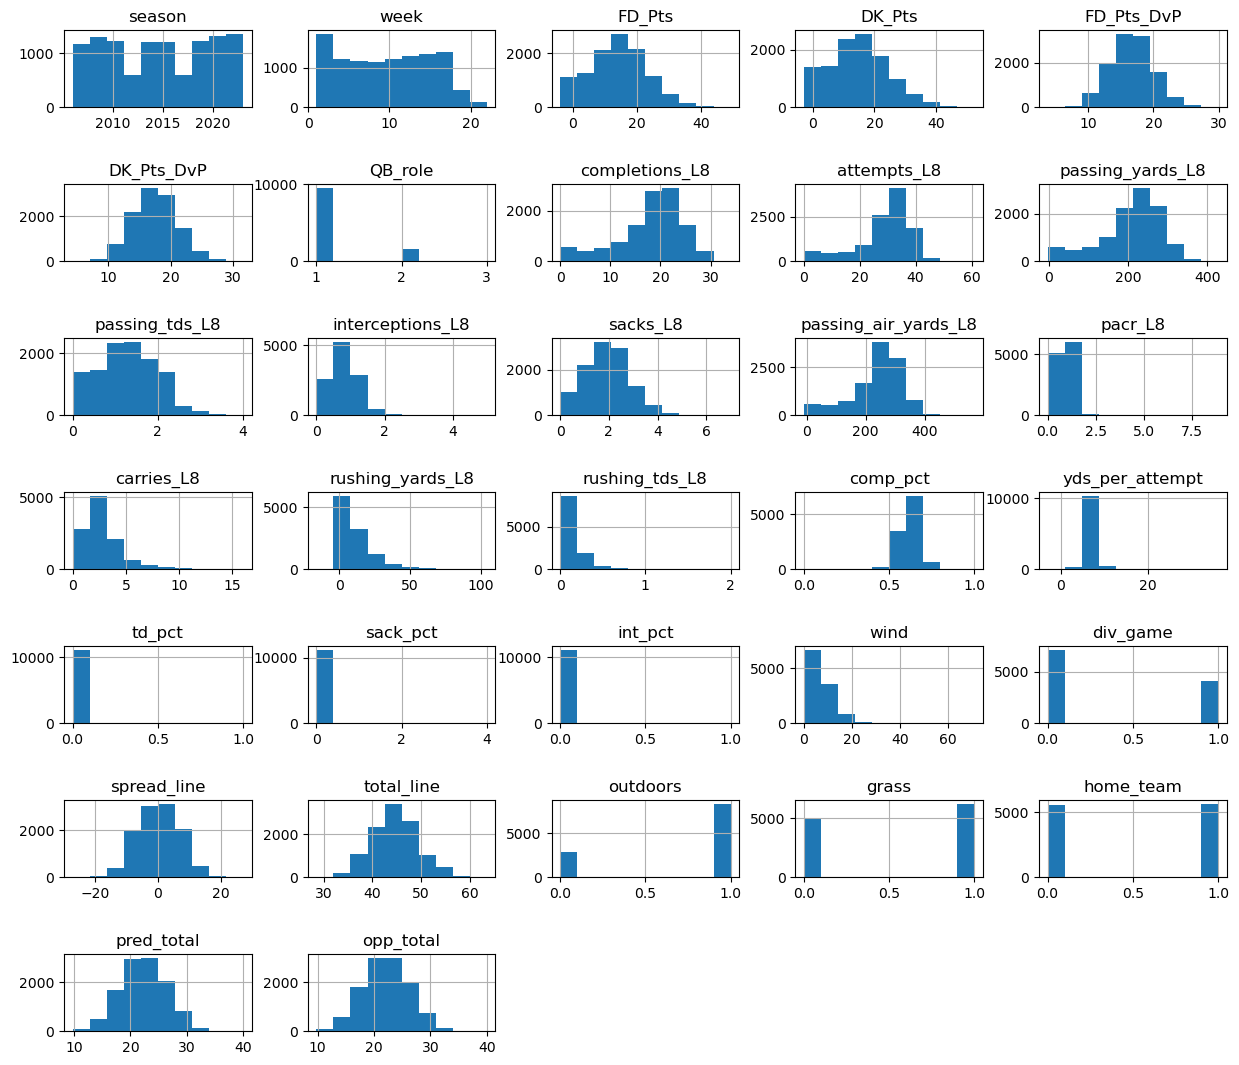

In [334]:
quarterback_df.hist(layout = (8, 5), figsize = (15, 15))
plt.subplots_adjust(hspace=1)
plt.show();

In [335]:
quarterback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11224 entries, 0 to 11223
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                11224 non-null  int64  
 1   week                  11224 non-null  int64  
 2   player_id             11224 non-null  object 
 3   player_display_name   11224 non-null  object 
 4   team                  11224 non-null  object 
 5   FD_Pts                11224 non-null  float64
 6   DK_Pts                11224 non-null  float64
 7   FD_Pts_DvP            11224 non-null  float64
 8   DK_Pts_DvP            11224 non-null  float64
 9   QB_role               11224 non-null  float64
 10  completions_L8        11224 non-null  float64
 11  attempts_L8           11224 non-null  float64
 12  passing_yards_L8      11224 non-null  float64
 13  passing_tds_L8        11224 non-null  float64
 14  interceptions_L8      11224 non-null  float64
 15  sacks_L8           

In [336]:
#import sqlite3

# Establish a connection to the SQLite database
conn = sqlite3.connect('nfl_dfs.db')

# Define the table name
table_name = 'qb_dataset'

# Specify data types
dtype = {
    'season': 'INTEGER',
    'week': 'INTEGER',
    'player_id': 'TEXT',
    'player_display_name': 'TEXT',
    'team': 'TEXT',
    'FD_Pts': 'REAL',
    'DK_Pts': 'REAL',
    'FD_Pts_DvP': 'REAL',
    'DK_Pts_DvP': 'REAL',
    'QB_role': 'REAL',
    'completions_L8': 'REAL',
    'attempts_L8': 'REAL',
    'passing_yards_L8': 'REAL',
    'passing_tds_L8': 'REAL',
    'interceptions_L8': 'REAL',
    'sacks_L8': 'REAL',
    'passing_air_yards_L8': 'REAL',
    'pacr_L8': 'REAL',
    'carries_L8': 'REAL',
    'rushing_yards_L8': 'REAL',
    'rushing_tds_L8': 'REAL',
    'comp_pct': 'REAL',
    'yds_per_attempt': 'REAL',
    'td_pct': 'REAL',
    'sack_pct': 'REAL',
    'int_pct': 'REAL',
    'wind': 'REAL',
    'div_game': 'REAL',
    'opponent': 'TEXT',
    'spread_line': 'REAL',
    'total_line': 'REAL',
    'outdoors': 'INTEGER',
    'grass': 'INTEGER',
    'home_team': 'INTEGER',
    'pred_total': 'REAL',
    'opp_total': 'REAL'
}

# Write the DataFrame to the SQLite table
quarterback_df.to_sql(table_name, conn, if_exists='replace', index=False, dtype=dtype)

# Confirm that the data has been written
print(f"Data written to table {table_name} in SQLite database nfl_dfs.db")

# Close the connection
conn.close()


Data written to table qb_dataset in SQLite database nfl_dfs.db
